**Analisis Pengaruh Tweets Akun Twitter Rizal Do Terkait Edukasi Mengenai Virus Covid-19 Terhadap Pengikutnya Menggunakan Metode Closeness Centrality**

Import library yang dibuthkan dalam project penelitian

In [12]:
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
%matplotlib inline

Read dataset yang digunakan dengan library pandas

In [13]:
df_covid = pd.read_csv("dataset.csv")
df_covid.head()

,count,tweet,from,to
0,0,@afrkml @sanantaftr Ners nanya dong. Hari kebe...,mikhaelpermanto,afrkml
1,1,@afrkml Oh gitu ya Alhamdulillah tercerahkan (...,sanantaftr,afrkml
2,2,@afrkml Ners izin share 🙏,fankooky,afrkml
3,3,@afrkml Ya allah masih ada,sweetxgrass,afrkml
4,4,@mikhaelpermanto @sanantaftr 14 hari setelah s...,afrkml,mikhaelpermanto


Hapus baris yang terdapat missing value dan memilih kolom atribut yang digunakan dalam penelitian


In [14]:
df_covid = df_covid.loc[:,['from','to']]
df_covid.dropna()
df_covid.head()

,from,to
0,mikhaelpermanto,afrkml
1,sanantaftr,afrkml
2,fankooky,afrkml
3,sweetxgrass,afrkml
4,afrkml,mikhaelpermanto


menggunakan library networkx (nx) untuk menentukan jumlah node dan edge yang ada pada dataset

In [15]:
graph_covid = nx.from_pandas_edgelist(df_covid,source="from",target="to")
print(nx.info(graph_covid))

Name: 
Type: Graph
Number of nodes: 338
Number of edges: 341
Average degree:   2.0178


Mencetak nama-nama node pada dataset dengan DataFrame

In [16]:
node = graph_covid.nodes()
df_node = pd.DataFrame(node)
df_node.rename(columns={0:"Node"})

,Node
0,mikhaelpermanto
1,afrkml
2,sanantaftr
3,fankooky
4,sweetxgrass
...,...
333,ccseptian
334,Mbaz_bolang
335,RatuAyu98857651
336,22Sxlena


Melakukan visualisasi struktur graf dari dataset yang digunakan, dengan labelnya masing-masing tiap node.

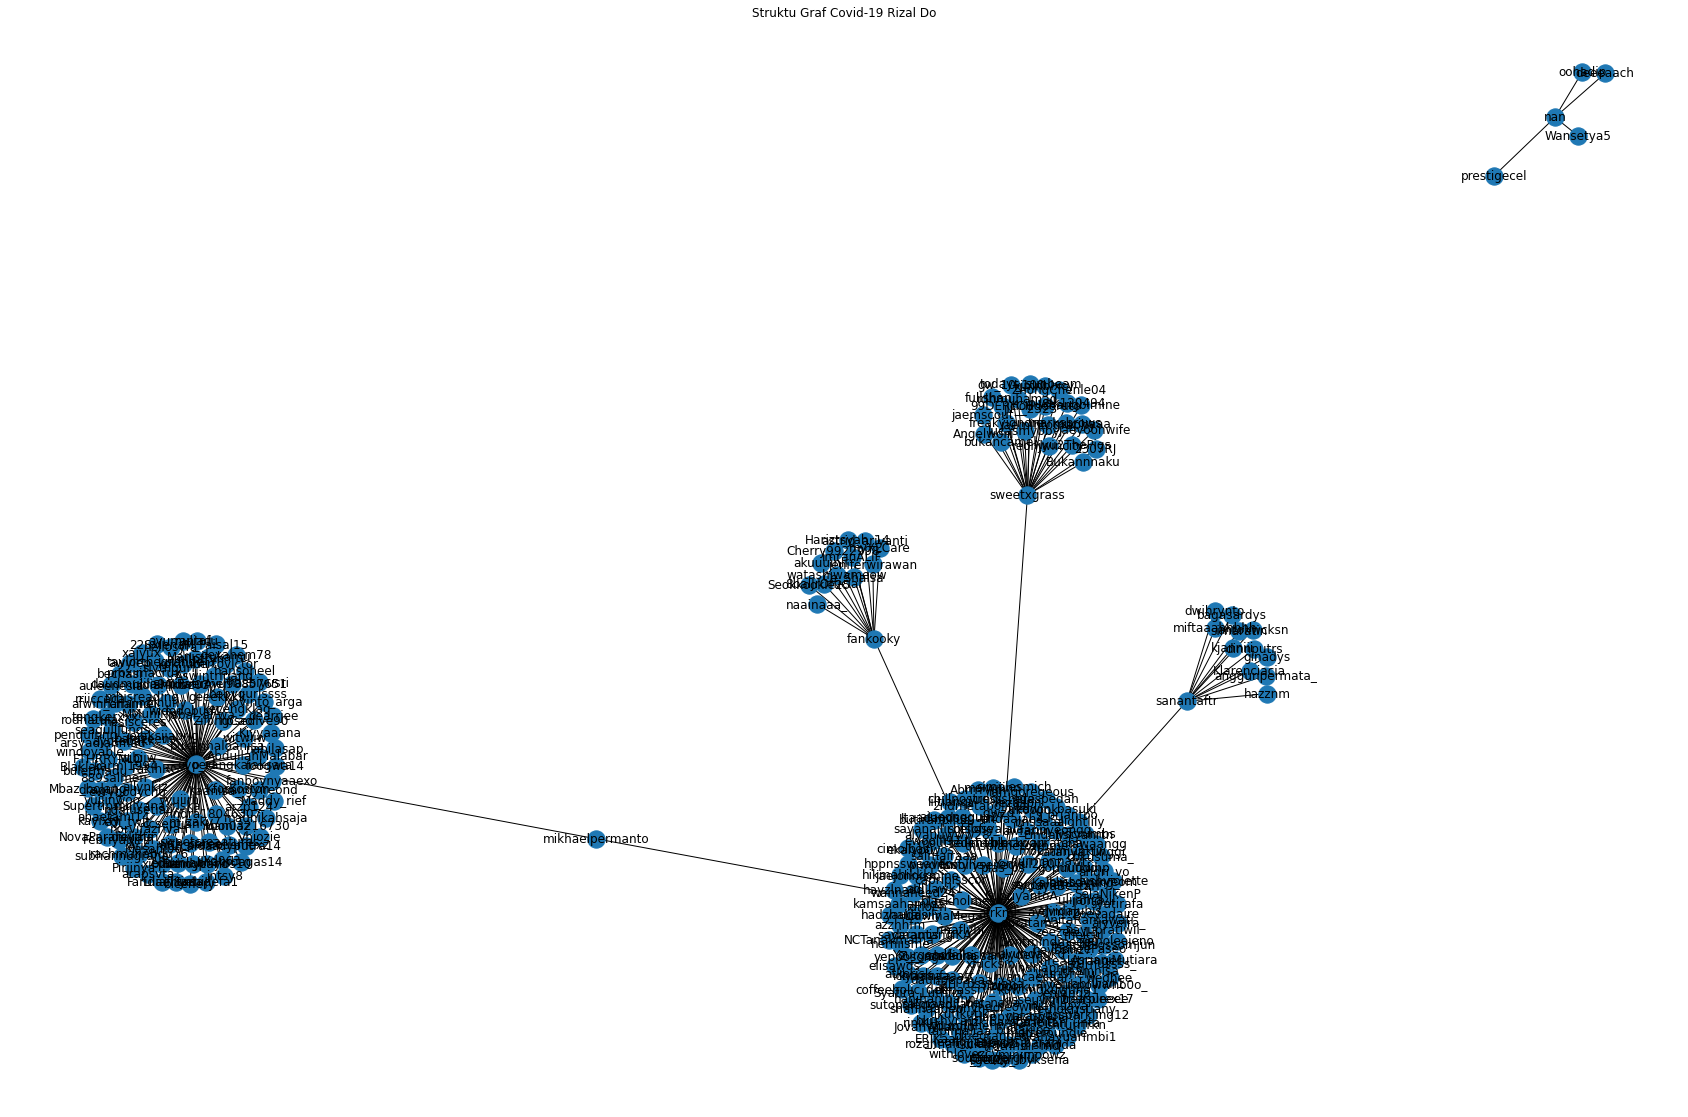

In [17]:
nx.draw
nx.draw_networkx
plt.figure(figsize=(30,20))
plt.title('Struktu Graf Covid-19 Rizal Do')
nx.draw(graph_covid,with_labels=True)

Melakukan analisi degree tiap node, dengan mengurutkan dari nilai tertinggi ke terkecil

In [18]:
temp = []
tap = nx.degree(graph_covid)
for i in tap:
    temp.append([i[0],i[1]])

sort_deg = pd.DataFrame(temp)
sort_deg.sort_values(1,axis=0,ascending = False,inplace = True)
sort_deg=sort_deg.rename(columns={0: "screen name", 1: "degree"})
sort_deg.head(5)

,screen name,degree
1,afrkml,172
5,ovo_id,117
4,sweetxgrass,27
3,fankooky,15
2,sanantaftr,14


Melakukan analisis Closeness Centrality, dengan mengurutkan nilai dari tertinggi ke terkecil

In [19]:
simpan = []
best_connector = nx.closeness_centrality(graph_covid)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    simpan.append([w,best_connector[w]])
    
df_clos = pd.DataFrame(simpan)
df_clos = df_clos.rename(columns={0:"Screen name",1:"Closenes centrality"})
df_clos.head(15)

,Screen name,Closenes centrality
0,afrkml,0.537951
1,mikhaelpermanto,0.461318
2,ovo_id,0.402801
3,sweetxgrass,0.367087
4,fankooky,0.357458
5,sanantaftr,0.356678
6,gopuuudd,0.348322
7,blissdyokyeom,0.348322
8,irhamnisa,0.348322
9,nayupratiwii,0.348322


Memilih 8 top closeness centrality tertinggi untuk divisualisasikan kedalam pie chart

In [20]:
df_visualisasi = pd.DataFrame(simpan[0:8])
df_visualisasi = df_visualisasi.rename(columns={0: "screen name", 1: "closeness centrality"})
df_visualisasi

,screen name,closeness centrality
0,afrkml,0.537951
1,mikhaelpermanto,0.461318
2,ovo_id,0.402801
3,sweetxgrass,0.367087
4,fankooky,0.357458
5,sanantaftr,0.356678
6,gopuuudd,0.348322
7,blissdyokyeom,0.348322


In [21]:
df_visualisasi.set_index('screen name', inplace=True)
df_visualisasi

,closeness centrality
screen name,
afrkml,0.537951
mikhaelpermanto,0.461318
ovo_id,0.402801
sweetxgrass,0.367087
fankooky,0.357458
sanantaftr,0.356678
gopuuudd,0.348322
blissdyokyeom,0.348322


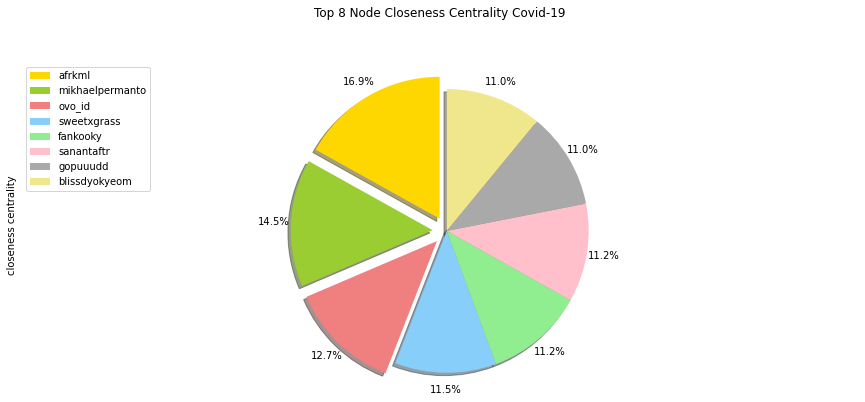

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','darkgray','khaki']
explode_list = [0.1, 0.1, 0.1, 0, 0, 0,0,0]

df_visualisasi['closeness centrality'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list 
                            )
plt.title('Top 8 Node Closeness Centrality Covid-19', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_visualisasi.index, loc='upper left') 
plt.show()